<a href="https://colab.research.google.com/github/guebin/IP2023WIN/blob/main/posts/Day1/03_Pandas/ls08.ipynb"><img src="https://colab.research.google.com/assets/colab-badge.svg" style="text-align: left"></a>

# imports 

In [50]:
import pandas as pd

# pandas 공부 4단계: 메소드

`-` df자료형의 메소드를 알아보자. 

## 전치  

In [ ]:
arr = np.arange(2*3).reshape(2,3)
df = pd.DataFrame(arr)
df

,0,1,2
0,0,1,2
1,3,4,5


In [ ]:
df.T

,0,1
0,0,3
1,1,4
2,2,5


## 합

In [ ]:
df

,0,1,2
0,0,1,2
1,3,4,5


In [ ]:
df.sum(axis=0)

0    3
1    5
2    7
dtype: int64

In [ ]:
df.sum(axis=1)

0     3
1    12
dtype: int64

## cumsum 

In [ ]:
df

,0,1,2
0,0,1,2
1,3,4,5


In [ ]:
df.cumsum(axis=1) 

,0,1,2
0,0,1,3
1,3,7,12


## 형태변환 

In [ ]:
df

,0,1,2
0,0,1,2
1,3,4,5


In [ ]:
df.to_dict()

{0: {0: 0, 1: 3}, 1: {0: 1, 1: 4}, 2: {0: 2, 1: 5}}

In [ ]:
df.to_numpy()

array([[0, 1, 2],
       [3, 4, 5]])

In [ ]:
df.to_numpy().tolist()

[[0, 1, 2], [3, 4, 5]]

# pandas 공부 5단계: 특수한 자료

## 시계열자료 

`-` 시계열자료 

In [5]:
pd.date_range('20211226',periods=10)

DatetimeIndex(['2021-12-26', '2021-12-27', '2021-12-28', '2021-12-29',
               '2021-12-30', '2021-12-31', '2022-01-01', '2022-01-02',
               '2022-01-03', '2022-01-04'],
              dtype='datetime64[ns]', freq='D')

In [6]:
df=pd.DataFrame(np.random.normal(size=(10,4)),columns=list('ABCD'),index=pd.date_range('20211226',periods=10))
df

,A,B,C,D
2021-12-26,0.371119,0.655977,-0.513274,-1.241766
2021-12-27,-0.767547,1.504455,1.558346,-0.877993
2021-12-28,-0.148075,-0.204683,-0.129049,0.785760
2021-12-29,-1.471922,-0.697783,0.854936,-0.067250
2021-12-30,-0.502604,-0.897220,-0.845852,-0.152592
2021-12-31,0.111328,-0.797072,-0.296837,-0.599656
2022-01-01,0.735519,-0.298760,0.769873,-1.278467
2022-01-02,-0.877739,0.939170,-0.147548,1.398392
2022-01-03,-1.234167,0.420109,-1.080176,-0.260910
2022-01-04,-0.717114,-1.526784,-0.204918,-0.679075


`-` 예제1: 시계열자료에서의 인덱싱

In [7]:
df.loc['2021-12-28':'2022-01-02',:]

,A,B,C,D
2021-12-28,-0.148075,-0.204683,-0.129049,0.785760
2021-12-29,-1.471922,-0.697783,0.854936,-0.067250
2021-12-30,-0.502604,-0.897220,-0.845852,-0.152592
2021-12-31,0.111328,-0.797072,-0.296837,-0.599656
2022-01-01,0.735519,-0.298760,0.769873,-1.278467
2022-01-02,-0.877739,0.939170,-0.147548,1.398392


`-` 예제3: 스트라이딩 (샘플링) 

In [8]:
df.loc[::3,:]

,A,B,C,D
2021-12-26,0.371119,0.655977,-0.513274,-1.241766
2021-12-29,-1.471922,-0.697783,0.854936,-0.067250
2022-01-01,0.735519,-0.298760,0.769873,-1.278467
2022-01-04,-0.717114,-1.526784,-0.204918,-0.679075


`-` 예제4: query를 이용한 인덱싱 

In [9]:
df.query("index <= '2021-12-30' or index=='2022-01-02'")

,A,B,C,D
2021-12-26,0.371119,0.655977,-0.513274,-1.241766
2021-12-27,-0.767547,1.504455,1.558346,-0.877993
2021-12-28,-0.148075,-0.204683,-0.129049,0.785760
2021-12-29,-1.471922,-0.697783,0.854936,-0.067250
2021-12-30,-0.502604,-0.897220,-0.845852,-0.152592
2022-01-02,-0.877739,0.939170,-0.147548,1.398392


## 더러운 자료

***예비학습: 하나의 col을 선택하는 가장 좋은 방법***

In [10]:
np.random.seed(43052)
att = np.random.choice(np.arange(10,21)*5,20)
rep = np.random.choice(np.arange(5,21)*5,20)
mid = np.random.choice(np.arange(0,21)*5,20)
fin = np.random.choice(np.arange(0,21)*5,20)
key = ['2022-12'+str(s) for s in np.random.choice(np.arange(300,501),20,replace=False)]
df = pd.DataFrame({'att':att,'rep':rep,'mid':mid,'fin':fin},index=key)
df.head()

,att,rep,mid,fin
2022-12380,65,55,50,40
2022-12370,95,100,50,80
2022-12363,65,90,60,30
2022-12488,55,80,75,80
2022-12312,80,30,30,100


`-` att 선택 

In [11]:
df.att

2022-12380    65
2022-12370    95
2022-12363    65
2022-12488    55
2022-12312    80
2022-12377    75
2022-12463    65
2022-12471    60
2022-12400    95
2022-12469    90
2022-12318    55
2022-12432    95
2022-12443    95
2022-12367    50
2022-12458    50
2022-12396    95
2022-12482    50
2022-12452    65
2022-12387    70
2022-12354    90
Name: att, dtype: int64

`-` 단점: 칼럼이름에 스페이스가 있으면 쓸 수 없음. 

***예비학습끝***

---

`-` 누가 자료를 아래와 같이 주었다고 하자. (엑셀특) 

In [12]:
df.columns = pd.Index(['att score', 'rep score', 'mid score', 'fin score'])
df.head()

,att score,rep score,mid score,fin score
2022-12380,65,55,50,40
2022-12370,95,100,50,80
2022-12363,65,90,60,30
2022-12488,55,80,75,80
2022-12312,80,30,30,100


`-` 출석점수를 뽑고 싶다면? 

In [13]:
df['att score']
# df.att score # 이코드는 실행불가능

2022-12380    65
2022-12370    95
2022-12363    65
2022-12488    55
2022-12312    80
2022-12377    75
2022-12463    65
2022-12471    60
2022-12400    95
2022-12469    90
2022-12318    55
2022-12432    95
2022-12443    95
2022-12367    50
2022-12458    50
2022-12396    95
2022-12482    50
2022-12452    65
2022-12387    70
2022-12354    90
Name: att score, dtype: int64

`-` 출석점수가 90보다 작은 학생을 뽑고 싶다면? 

In [14]:
df.loc[df['att score'] < 90, :] 
# df.query('att score < 90')

,att score,rep score,mid score,fin score
2022-12380,65,55,50,40
2022-12363,65,90,60,30
2022-12488,55,80,75,80
2022-12312,80,30,30,100
2022-12377,75,40,100,15
2022-12463,65,45,45,90
2022-12471,60,60,25,0
2022-12318,55,75,35,25
2022-12367,50,80,40,30
2022-12458,50,55,15,85


`-` 그냥 컬럼이름을 바꾸고 하는것도 방법임 

In [15]:
df.columns = pd.Index([l.replace(' ','_') for l in list(df.columns)])
df.head()

,att_score,rep_score,mid_score,fin_score
2022-12380,65,55,50,40
2022-12370,95,100,50,80
2022-12363,65,90,60,30
2022-12488,55,80,75,80
2022-12312,80,30,30,100


In [16]:
df.query('att_score<90')
df.att_score

2022-12380    65
2022-12370    95
2022-12363    65
2022-12488    55
2022-12312    80
2022-12377    75
2022-12463    65
2022-12471    60
2022-12400    95
2022-12469    90
2022-12318    55
2022-12432    95
2022-12443    95
2022-12367    50
2022-12458    50
2022-12396    95
2022-12482    50
2022-12452    65
2022-12387    70
2022-12354    90
Name: att_score, dtype: int64

`-` 그렇지만 col이름을 바꾸는게 항상 만능은 아니다. 

## 개인습관 

`-` row의 이름은 없는게 낫다고 생각함 // 시계열자료는 예외 

In [17]:
np.random.seed(43052)
att = np.random.choice(np.arange(10,21)*5,20)
rep = np.random.choice(np.arange(5,21)*5,20)
mid = np.random.choice(np.arange(0,21)*5,20)
fin = np.random.choice(np.arange(0,21)*5,20)
key = ['2022-12'+str(s) for s in np.random.choice(np.arange(300,501),20,replace=False)]
df = pd.DataFrame({'att':att,'rep':rep,'mid':mid,'fin':fin},index=key)
df.head()

,att,rep,mid,fin
2022-12380,65,55,50,40
2022-12370,95,100,50,80
2022-12363,65,90,60,30
2022-12488,55,80,75,80
2022-12312,80,30,30,100


In [18]:
df2 = df.reset_index().rename(columns={'index':'student_id'})
df2.head()

,student_id,att,rep,mid,fin
0,2022-12380,65,55,50,40
1,2022-12370,95,100,50,80
2,2022-12363,65,90,60,30
3,2022-12488,55,80,75,80
4,2022-12312,80,30,30,100


`-` 편해

In [19]:
#df2.loc[0,'student_id':'rep'] 
#df2.loc[[0],'student_id':'rep'] 
#df2.loc[[0,4,5],'student_id':'rep'] 
#df2.loc[range(5),'student_id':'rep'] 
#df2.loc[5::2,'student_id':'rep'] 

# pandas 공부 6단계: 할당 

`-` 자료

In [41]:
np.random.seed(43052)
att = np.random.choice(np.arange(10,21)*5,20)
rep = np.random.choice(np.arange(5,21)*5,20)
mid = np.random.choice(np.arange(0,21)*5,20)
fin = np.random.choice(np.arange(0,21)*5,20)
student_id = [ '2023-12362', '2022-12471', '2023-12333', '2022-12400', '2022-12377',
               '2022-12469', '2023-12314', '2022-12363', '2023-12445', '2023-12336',
               '2023-12426', '2022-12380', '2023-12422', '2022-12488', '2022-12370',
               '2023-12443', '2022-12463', '2023-12491', '2023-12340', '2022-12312' ]
df = pd.DataFrame({'student_id':student_id,'att':att,'rep':rep,'mid':mid,'fin':fin})
df

,student_id,att,rep,mid,fin
0,2023-12362,65,55,50,40
1,2022-12471,95,100,50,80
2,2023-12333,65,90,60,30
3,2022-12400,55,80,75,80
4,2022-12377,80,30,30,100
5,2022-12469,75,40,100,15
6,2023-12314,65,45,45,90
7,2022-12363,60,60,25,0
8,2023-12445,95,65,20,10
9,2023-12336,90,80,80,20


## Assign

`-` 방법1: assign을 이용한 추가 

In [42]:
df.assign(total = df.att*0.1 + df.rep*0.2 + df.mid*0.3 + df.fin*0.4) 

,student_id,att,rep,mid,fin,total
0,2023-12362,65,55,50,40,48.5
1,2022-12471,95,100,50,80,76.5
2,2023-12333,65,90,60,30,54.5
3,2022-12400,55,80,75,80,76.0
4,2022-12377,80,30,30,100,63.0
5,2022-12469,75,40,100,15,51.5
6,2023-12314,65,45,45,90,65.0
7,2022-12363,60,60,25,0,25.5
8,2023-12445,95,65,20,10,32.5
9,2023-12336,90,80,80,20,57.0


> 이 방법은 df를 일시적으로 변화시킴

## Eval

`-` 방법2: eval을 이용한 추가 

In [43]:
df.eval('total = att*0.1 + rep*0.2 + mid*0.3 + fin*0.4') 

,student_id,att,rep,mid,fin,total
0,2023-12362,65,55,50,40,48.5
1,2022-12471,95,100,50,80,76.5
2,2023-12333,65,90,60,30,54.5
3,2022-12400,55,80,75,80,76.0
4,2022-12377,80,30,30,100,63.0
5,2022-12469,75,40,100,15,51.5
6,2023-12314,65,45,45,90,65.0
7,2022-12363,60,60,25,0,25.5
8,2023-12445,95,65,20,10,32.5
9,2023-12336,90,80,80,20,57.0


> 이 방법은 df를 일시적으로 변화시킴

## df['colname'] = xxx 

`-` 방법3: `df['total']` 을 이용한 할당 

In [44]:
df['total'] = df.att*0.1 + df.rep*0.2 + df.mid*0.3 + df.fin*0.4
df

,student_id,att,rep,mid,fin,total
0,2023-12362,65,55,50,40,48.5
1,2022-12471,95,100,50,80,76.5
2,2023-12333,65,90,60,30,54.5
3,2022-12400,55,80,75,80,76.0
4,2022-12377,80,30,30,100,63.0
5,2022-12469,75,40,100,15,51.5
6,2023-12314,65,45,45,90,65.0
7,2022-12363,60,60,25,0,25.5
8,2023-12445,95,65,20,10,32.5
9,2023-12336,90,80,80,20,57.0


> 이 방법은 df를 영구적으로 변화시킴

`-` 문제: 아래의 자료에서 입학년도를 추가하고 싶다면? 

In [49]:
np.random.seed(43052)
att = np.random.choice(np.arange(10,21)*5,20)
rep = np.random.choice(np.arange(5,21)*5,20)
mid = np.random.choice(np.arange(0,21)*5,20)
fin = np.random.choice(np.arange(0,21)*5,20)
student_id = [ '2023-12362', '2022-12471', '2023-12333', '2022-12400', '2022-12377',
               '2022-12469', '2023-12314', '2022-12363', '2023-12445', '2023-12336',
               '2023-12426', '2022-12380', '2023-12422', '2022-12488', '2022-12370',
               '2023-12443', '2022-12463', '2023-12491', '2023-12340', '2022-12312' ]
df = pd.DataFrame({'student_id':student_id,'att':att,'rep':rep,'mid':mid,'fin':fin})
df.head()

,student_id,att,rep,mid,fin
0,2023-12362,65,55,50,40
1,2022-12471,95,100,50,80
2,2023-12333,65,90,60,30
3,2022-12400,55,80,75,80
4,2022-12377,80,30,30,100


In [48]:
df.assign(year=[l.split('-')[0] for l in list(df.student_id)]).query('year=="2022"')

,student_id,att,rep,mid,fin,year
1,2022-12471,95,100,50,80,2022
3,2022-12400,55,80,75,80,2022
4,2022-12377,80,30,30,100,2022
5,2022-12469,75,40,100,15,2022
7,2022-12363,60,60,25,0,2022
11,2022-12380,95,95,45,0,2022
13,2022-12488,50,80,40,30,2022
14,2022-12370,50,55,15,85,2022
16,2022-12463,50,50,45,10,2022
19,2022-12312,90,90,80,90,2022


# Quiz

아래는 전북대 통계학과 학생들이 R과 Python을 공부한 평균 시간이다. 

In [26]:
np.random.seed(20230426)
day = ['2023-04-24(Mon)','2023-04-25(Tue)','2023-04-26(Wed)','2023-04-27(Thu)','2023-04-28(Fri)',
       '2023-05-01(Mon)','2023-05-02(Tue)','2023-05-03(Wed)','2023-05-04(Thu)','2023-05-05(Fri)',
       '2023-05-08(Mon)','2023-05-09(Tue)','2023-05-10(Wed)','2023-05-11(Thu)','2023-05-12(Fri)']
hours1 = np.random.randn(15).cumsum()*2
hours1 = hours1 - hours1.min() +1
hours2 = np.random.randn(15).cumsum()*2
hours2 = hours2 - hours2.min() +1

df = pd.DataFrame({'hours(R)':hours1, 'hours(Python)':hours2},index=day)
df

,hours(R),hours(Python)
2023-04-24(Mon),11.064829,9.254671
2023-04-25(Tue),9.790750,7.327548
2023-04-26(Wed),5.993362,9.185495
2023-04-27(Thu),7.542498,12.525569
2023-04-28(Fri),8.598600,10.906909
2023-05-01(Mon),6.933549,9.865538
2023-05-02(Tue),6.456987,11.081043
2023-05-03(Wed),4.976548,10.240239
2023-05-04(Thu),6.021139,5.822405
2023-05-05(Fri),1.851839,5.522484


`(1)` 데이터프레임을 변형하여 아래와 같이 만들어라. 

In [39]:
#

,hours(R),hours(Python),day,weekday
0,11.064829,9.254671,2023-04-24,Mon
1,9.790750,7.327548,2023-04-25,Tue
2,5.993362,9.185495,2023-04-26,Wed
3,7.542498,12.525569,2023-04-27,Thu
4,8.598600,10.906909,2023-04-28,Fri
5,6.933549,9.865538,2023-05-01,Mon
6,6.456987,11.081043,2023-05-02,Tue
7,4.976548,10.240239,2023-05-03,Wed
8,6.021139,5.822405,2023-05-04,Thu
9,1.851839,5.522484,2023-05-05,Fri


`(2)` 4월달에 전북대학교 학생들은 R과 Python중 어떤 과목을 더 많이 공부하였는가? 

`(3)` '월-금' 사이의 요일중 R을 가장 열심히 공부한 요일은 어느 요일인가? 

`(4)` '월-금'사이의 요일중 Python과 R의 합계학습량이 가장 큰 요일은 어느 요일인가? 

`(5)` R과 Python의 학습량 차이를 계산하고 (R-Python을 계산) maplotlib 을 이용하여 시각화하라. 

(풀이)

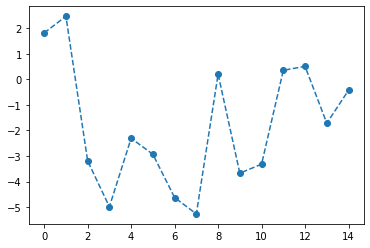

In [ ]:
# 시각화예시